# Executive summary


Student: Yue Ling

Year: 2022



# Included Modules and Packages

Code cell containing your includes for modules and packages

In [2]:
import psycopg2
import json
import csv
from datetime import datetime as dt


import math
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns


from IPython.display import display, HTML


# Supporting code

Code cells containing any supporting code, such as connecting to the database, any functions, etc.  



In [3]:
def my_select_query_pandas(query, rollback_before_flag, rollback_after_flag):
    "function to run a select query and return rows in a pandas dataframe"
    
    if rollback_before_flag:
        connection.rollback()
    
    df = pd.read_sql_query(query, connection)
    
    if rollback_after_flag:
        connection.rollback()
    
    # fix the float columns that really should be integers
    
    for column in df:
    
        if df[column].dtype == "float64":

            fraction_flag = False

            for value in df[column].values:
                
                if not np.isnan(value):
                    if value - math.floor(value) != 0:
                        fraction_flag = True

            if not fraction_flag:
                df[column] = df[column].astype('Int64')
    
    return(df)
    
connection = psycopg2.connect(
    user = "postgres",
    password = "ucb",
    host = "postgres",
    port = "5432",
    database = "postgres"
)


cursor = connection.cursor()

def my_read_csv_file(file_name, limit):
    "read the csv file and print only the first limit rows"
    
    csv_file = open(file_name, "r")
    
    csv_data = csv.reader(csv_file)
    
    i = 0
    
    for row in csv_data:
        i += 1
        if i <= limit:
            print(row)
            
    print("\nPrinted ", min(limit, i), "lines of ", i, "total lines.")
def my_recursive_print_json(j, level = -1):
    "given a json object print it"
    
    level += 1
    
    spaces = "    "
    
    if type(j) is dict:
        dict_2_list = list(j.keys())
        for k in dict_2_list:
            print(spaces * level + k)
            my_recursive_print_json(j[k], level)
            
    elif type(j) is list:
        for (i, l) in enumerate(j):
            print(spaces * level + "[" + str(i) + "]")
            my_recursive_print_json(l, level)
                  
    else:
        print(spaces * level + "value:", str(j))
                  
def my_read_nested_json(file_name):
    "given a file of json, read it and parse it meaningfully"
    
    f = open(file_name, "r")
    
    j = json.load(f)
    
    f.close
    
    my_recursive_print_json(j)
def my_explore_staging_table(table_name):
    "given a table name, explore it"
    
    print("\n---------------------------------------------------")
    print("Exploring Columns for Table:", table_name)
    print("---------------------------------------------------\n")
    
    rollback_before_flag = True
    rollback_after_flag = True
    
    connection.rollback()
    
    query = "select * from " + table_name + " where 0 = 1;"
    
    cursor.execute(query)

    connection.rollback()    

    column_list = [d[0] for d in cursor.description]
    
    for column_name in column_list:
        
        if column_name == "stage_id":
            continue;
        
        print("---------------------------------------------------")
        print("Column:", column_name)
        print("---------------------------------------------------")

        
        query = "select min(length(" + column_name + ")) as min_length, "
        query += " max(length(" + column_name + ")) as max_length, "
        query += " count(*) as total_rows, "
        query += " count(distinct " + column_name + ") as total_distinct_values"
        query += " from " + table_name + ";"
        
        df = my_select_query_pandas(query, rollback_before_flag, rollback_after_flag)
        
        display(HTML(df.to_html()))
        
        query = "select " + column_name + ", count(*) from " + table_name 
        query += " group by " + column_name + " order by 2 desc limit 10;"
        
        df = my_select_query_pandas(query, rollback_before_flag, rollback_after_flag)
        
        display(HTML(df.to_html()))

# 2.7.1 Executive summary





# Following shows AGM's top 50 most valued customers

In [5]:
# this is most money spent as "best customer" shown first 
# show top 50 // spend $7000 
rollback_before_flag = True
rollback_after_flag = True

query = """

select c.customer_id , count(sa.sale_date) as num_visits, sum(sa.total_amount) as total_spent,
    c.distance as distance2store
from customers c
    join sales sa
        on c.customer_id = sa.customer_id

group by 1
having count(sa.sale_date) >= 1

order by 3 desc
limit 50
"""
df = my_select_query_pandas(query, rollback_before_flag, rollback_after_flag)
df

,customer_id,num_visits,total_spent,distance2store
0,30772,110,8328,13
1,30775,108,7908,13
2,30692,100,7860,13
3,30323,106,7848,11
4,28543,108,7848,4
5,27762,119,7848,2
6,28918,123,7836,5
7,28161,117,7836,3
8,29874,107,7824,8
9,30965,108,7812,16


# How many of the top 50 highest spending AGM customers are eligible for the Peak delivery service of 5 Mi radius? 

From the following cells only 20 of the top 50 highest spending AGM customers are eligible for Peak's delivery service. The average distance from a store for the Top 50 customers are 8.22 miles away. 



In [72]:
print ('Average distance to cloest store for top 50 highest spenders: '
       , df.distance2store.mean())

Average distance to cloest store for top 50 highest spenders:  8.22


In [77]:
print ('How many of top 50 highest spenders are eligible for Peak delivery: ', 
       sum(df.distance2store[df.distance2store<= 5].value_counts().values))
       


How many of top 50 highest spenders are eligible for Peak delivery:  20


# How many of AGM's top 50 highest spenders are also Peak's customers?

From the following cell, Peak currently does not deliver to AGM's top 50 spenders. This may be a good thing as AGM does not need to dilute its net profit by giving 18% of sales to Peak. 

In [81]:
# this is most money spent as "best customer" shown first 
# show top 50 // spend $7000 
rollback_before_flag = True
rollback_after_flag = True

query = """
with topspenders as(
    select c.customer_id , count(sa.sale_date) as num_visits, sum(sa.total_amount) as total_spent,
        c.distance as distance2store, c.first_name, c.last_name
    from customers c
        join sales sa
            on c.customer_id = sa.customer_id

    group by 1
    having count(sa.sale_date) >= 1

    order by 3 desc
    limit 50
)

select *
from stage_1_peak_customers
where first_name in (select first_name from topspenders) and 
    last_name in (select last_name from topspenders)

"""

# need to match both first and last name for lesser possibility of wrong match customers // Liuka
df = my_select_query_pandas(query, rollback_before_flag, rollback_after_flag)
df

,stage_id,sale_id,customer_id,first_name,last_name,street,city,state,zip


# How many of AGM's top 50 highest store-visit customers are also Peak's customers?
From the following cell, Peak currently does not deliver to AGM's top 50 highest-frequency store visits customers. This may be a good thing as AGM does not need to dilute its net profit by giving 18% of sales to Peak. 

In [112]:
# this is most visits as "best customer" shown first 
# show top 50 
rollback_before_flag = True
rollback_after_flag = True

query = """
with highestfreq as(
   select c.customer_id , count(sa.sale_date) as num_visits, 
       sum(sa.total_amount) as total_spent, c.first_name as first_name
        , c.last_name as last_name
    from customers c
        join sales sa
            on c.customer_id = sa.customer_id

    group by 1
    having count(sa.sale_date) >= 1

    order by 2 desc
    limit 50
)

select *
from stage_1_peak_customers
where first_name in (select first_name from highestfreq) and 
    last_name in (select last_name from highestfreq)

"""

# need to match both first and last name for lesser possibility of wrong match customers // Liuka
df = my_select_query_pandas(query, rollback_before_flag, rollback_after_flag)
df

,stage_id,sale_id,customer_id,first_name,last_name,street,city,state,zip


# Could temperature or type of food preparation that are suitable for delivery sell better on Peak? 

As evident in the following cells and figures, the exact same distribution of meals are sold through Peak vs. AGM's own in-store purchases. 

In [147]:
rollback_before_flag = True
rollback_after_flag = True

query = """

with a as(
    select pe.product_id, pe.peak_product_id, p.description as product_name
    from peak_product_mapping pe
        join products p
            on p.product_id = pe.product_id
    order by p.product_id
)

select   a.product_name, sum(quantity::numeric) as total_meals_sold
from stage_1_peak_line_items l
    join a a
        on a.peak_product_id::numeric = l.product_id::numeric
group by l.product_id, a.product_name
order by sum(quantity::numeric) desc

"""

df2 = my_select_query_pandas(query, rollback_before_flag, rollback_after_flag)
df2

,product_name,total_meals_sold
0,Pistachio Salmon,113
1,Eggplant Lasagna,107
2,Curry Chicken,101
3,Teriyaki Chicken,80
4,Brocolli Stir Fry,60
5,Tilapia Piccata,44
6,Spinach Orzo,27
7,Chicken Salad,8


In [151]:
rollback_before_flag = True
rollback_after_flag = True

query = """

select sum(l.quantity) as meals_purchased, p.description as meals
from line_items l
join products p
on p.product_id = l.product_id
group by 2
order by 1 desc

"""
#can also do count(*)

df3 = my_select_query_pandas(query, rollback_before_flag, rollback_after_flag)
df3

,meals_purchased,meals
0,1828778,Pistachio Salmon
1,1599058,Eggplant Lasagna
2,1368884,Curry Chicken
3,1145013,Teriyaki Chicken
4,913984,Brocolli Stir Fry
5,687237,Tilapia Piccata
6,456769,Spinach Orzo
7,228561,Chicken Salad


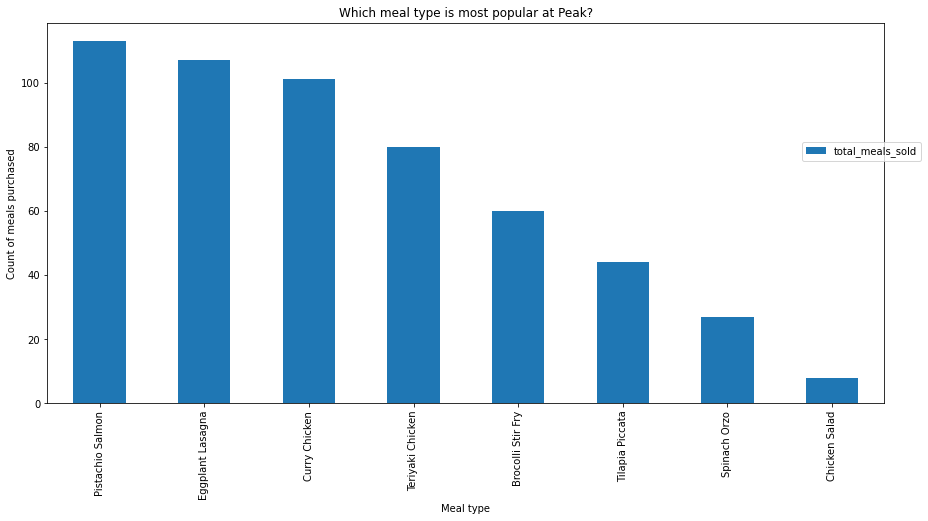

In [149]:
df2.plot.bar(figsize=(15,7))

plt.title('Which meal type is most popular at Peak?')
plt.xlabel('Meal type')
plt.ylabel('Count of meals purchased')

plt.xticks(np.arange(8), labels=df2['product_name'])
plt.legend(bbox_to_anchor=(1.05, 0.7))
plt.show()

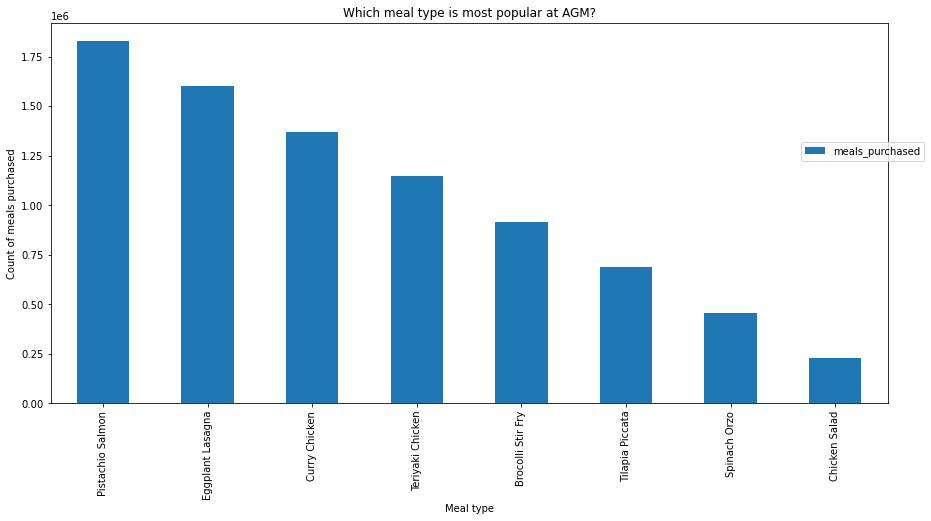

In [153]:
df3.plot.bar(figsize=(15,7))

plt.title('Which meal type is most popular at AGM?')
plt.xlabel('Meal type')
plt.ylabel('Count of meals purchased')

plt.xticks(np.arange(8), labels=df3['meals'])
plt.legend(bbox_to_anchor=(1.05, 0.7))
plt.show()

# Do customers who frequent the store more use deliveries more?
With just a single day of data, all Peak's customers only ordered once, so don't know overall trend yet. With time, this comparison to number of store visits can offer more insights as to whether deliveries are a feasible expansion plan.

In [103]:
# every Peak customer only used the service 1 time that day  
rollback_before_flag = True
rollback_after_flag = True

query = """


select count(*)
from stage_1_peak_customers
group by first_name, last_name

"""
df = my_select_query_pandas(query, rollback_before_flag, rollback_after_flag)
df.value_counts()


count
1        97
dtype: int64

# Do customers who live further away use Peak's delivery more?
As shown in the following cells, there is no strong relationship between distance and increases in Peak's online-ordering.

In [8]:
# see how much the peak customers spend at AGM in-store purchases 
rollback_before_flag = True
rollback_after_flag = True

query = """

with peak_customer as(
    select last_name as peak_last_name, first_name as peak_first_name
    from stage_1_peak_customers
)
    
select c.customer_id , count(sa.sale_date) as num_visits, 
    sum(sa.total_amount) as total_spent,
    c.distance as distance2store, c.first_name, c.last_name
from customers c
    join sales sa
        on c.customer_id = sa.customer_id
where c.first_name in (select peak_first_name from peak_customer) and 
    c.last_name in (select peak_last_name from peak_customer)
group by 1
having count(sa.sale_date) >= 1

order by 3 desc
"""
df = my_select_query_pandas(query, rollback_before_flag, rollback_after_flag)
df


,customer_id,num_visits,total_spent,distance2store,first_name,last_name
0,2399,78,5964,4,Luelle,Cauldwell
1,1609,85,5604,3,Sebastiano,Bains
2,931,82,5436,2,Lavena,Toynbee
3,2767,87,5412,4,Stanton,Guymer
4,1356,78,5388,2,Kay,Cantopher
...,...,...,...,...,...,...
83,3280,31,1680,5,Barny,Cheal
84,3438,25,1680,5,Linnell,Barr
85,586,23,1548,1,Cristabel,Keyme
86,1494,24,1344,3,Sibelle,Yakov


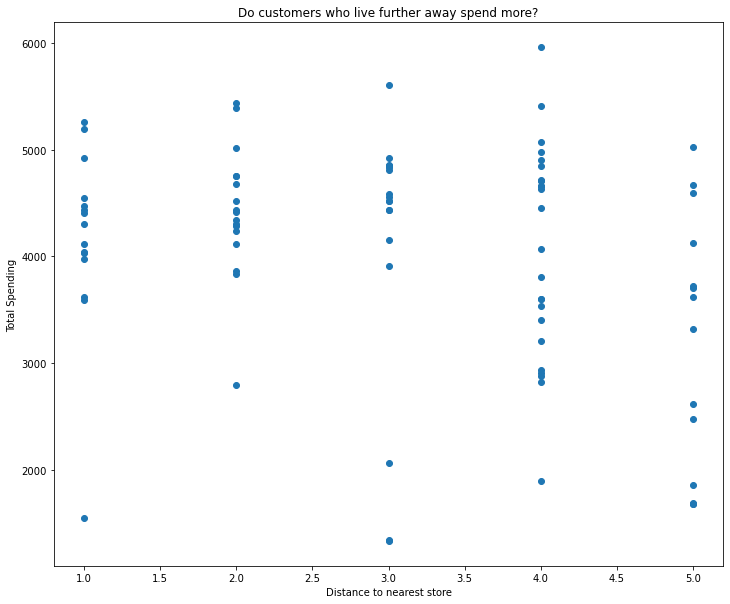

In [9]:
plt.figure (figsize=(12,10))
plt.scatter(df.distance2store, df.total_spent)
plt.title('Do customers who live further away spend more?')
plt.ylabel('Total Spending')
plt.xlabel('Distance to nearest store')
plt.show()


In [10]:
# this is most money spent as "best customer" shown first 
# show top 50 // spend $7000 
rollback_before_flag = True
rollback_after_flag = True

query = """

    select c.customer_id , count(sa.sale_date) as num_visits, 
        sum(sa.total_amount) as total_spent,
        c.distance as distance2store, c.first_name, c.last_name
    from customers c
        join sales sa
            on c.customer_id = sa.customer_id

    group by 1
    having count(sa.sale_date) >= 1

    order by 3 desc
    limit 50

"""

# need to match both first and last name for lesser possibility of wrong match customers // Liuka
df1 = my_select_query_pandas(query, rollback_before_flag, rollback_after_flag)
df1

,customer_id,num_visits,total_spent,distance2store,first_name,last_name
0,30772,110,8328,13,Marthena,Hrinchishin
1,30775,108,7908,13,Howey,Di Dello
2,30692,100,7860,13,Benjamen,Eva
3,30323,106,7848,11,Wilbur,Garvie
4,28543,108,7848,4,Marmaduke,Sherebrooke
5,27762,119,7848,2,Jenelle,Goretti
6,28918,123,7836,5,Liuka,Oseman
7,28161,117,7836,3,Jemima,Bondesen
8,29874,107,7824,8,Juliette,Cullen
9,30965,108,7812,16,Laetitia,Kayley


# How much do peak customers spend at AGM in-store purchases compared to the top in-store spenders?
As shown in the following cell, There is a significant difference in spending amongst Peak's customers compared to the top-tier AGM's customers who spend upwards of 7000 dollars per year. Peak's customers spend in the 4500 dollars range per year and are mainly the middle to lower tier AGM's in-store customers.

[Text(0, 0, 'Peak Spenders'), Text(1, 0, 'AGM Top 50 Spenders')]

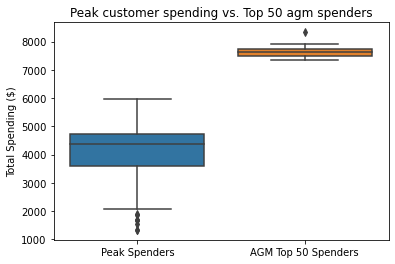

In [11]:
ax = sns.boxplot(data=[ df.total_spent, df1.total_spent])
ax.set_title('Peak customer spending vs. Top 50 agm spenders')
ax.set_ylabel('Total Spending ($)')

ax.set_xticklabels(['Peak Spenders', 'AGM Top 50 Spenders'])




# Executive Summary 

## Meals sold

The same types of meals are popular for Peak's online ordering as AGM's own in-store sales with Pistachio Salmon continuing to sell the most and Chicken Salad selling the least. This means that we can't use the online ordering to capture customers that can get rid of the less-popular meals inventory(chicken salads, spinach orzo...etc.).

## Distance and Peak's online ordering
There does not seem to be a strong indication of distance from store and more online purchases with Peak's.  


## Benefit of Staging: Recommendation to Peak's data collection process
From the preliminary analysis with last notebooks' staging tables, AGM can reflect to Peak about some of the data collection suggestions / improvement we would like Peak to implement. Had we implemented a waterfall approach, we would not have been able to make the following suggestions (too late for Peak to make any adoptions to their data collections) to Peak:

1) include a section for preferred name (e.g. I for Israel)

2) remind customers to sign up in CORRECT and CONSISTENT (appostrophes, address without abbreviations) spelling as the ones used for AGM's sign up

3) have a section to ask if the customer is a first time customer. If the customer is a first comer, and not in AGM's database, there would obviously be a mismatch to AGM's records. This would also offer insights to whether our business is growing from the online ordering to new customer base. 


## Benefit of the current status-quo: Withhold customers list from Peak and Peak's delivery customers

Preliminary analysis done on October 3, 2020's Peak's sales shows that Peak does not deliver to the top 50 most-frequent and the top 50 highest spending in-store AGM customers. This may further strengthen my recommendation in Notebook 2_5 of with-holding our customers information. If these high-value customers are not current Peak's customers and they continue to make the same in-store purchasing patterns, we would be netting a higher profit without cutting 18% commission to Peak. At present, only 40% of our top 50 highest value customers are within the 5 mi radius delivered by Peak, upon learning about the address information for the highest-value customers, Peak may extend their delivery range to 10 mi (average radius from store for 50 most-valuable customers are within 8.3 mi radius) and cut into our profit. 

At present, the customers Peak is delivering to are middle to lower valued customers in terms of money-spent and number of in-store visits. This customer group would be perfect for using Peak's services and expand growth for AGM as these customers simply don't come to the stores as often or spend as much as our most-valued in-store customers. At the expense of 18% of commission we give to Peak, we are hopefully offering convenience to these middle tier value customers. With time and further data provided as the trials proceed, by word of mouth and maybe more sales from the added convenience of online deliveries, these "middle" tier value customers may shift towards higher tiered customers.
